In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline 

In [3]:
data = pd.read_csv('tv_advertising.csv', index_col=[0])
data.head()

,TV,Sales
0,44.5,10.4
1,17.2,9.3
2,180.8,12.9
3,8.7,7.2
4,57.5,11.8


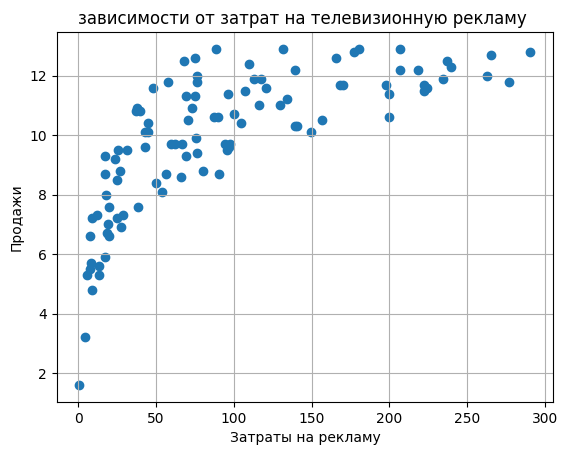

In [26]:
# разобьем данные на признаки и целевой показатель
data_x = data['TV']
data_y = data['Sales'] 

#построим график
plt.scatter(data_x, data_y)
plt.title('зависимости от затрат на телевизионную рекламу ')
plt.xlabel('Затраты на рекламу')
plt.ylabel('Продажи')
plt.grid()
plt.show()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, test_size=.25, random_state=12345) 

In [28]:
# обучим модель линейной регрессии
model_lin = LinearRegression()
x_train = np.array(x_train).reshape(-1, 1)
model_lin.fit(x_train, y_train)

# построим прогноз на тестовой выборке, вычислим R2
x_test = np.array(x_test).reshape(-1, 1)
y_pred_lin = model_lin.predict(x_test) 
r2_lin = r2_score(y_test, y_pred_lin)

print(f'Линейная регрессия: на тестовой выборке R2={r2_lin:.3f}')

Линейная регрессия: на тестовой выборке R2=0.392


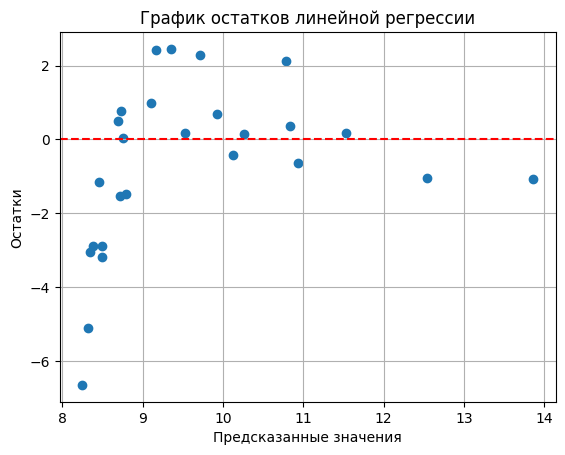

In [29]:
# построим график остатков линейной модели
residuals_lin = y_test - y_pred_lin
plt.scatter(y_pred_lin, residuals_lin)
plt.axhline(0, linestyle='--', color='red')
plt.title('График остатков линейной регрессии')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.grid()
plt.show()

график остатков показывает нам, что модель плохо описывает данные.

In [40]:
# обучим модель полиномиальной регрессии степени 2
degree = 4
model_poly = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    LinearRegression()
)
model_poly.fit(x_train, y_train)

# построим прогноз на тестовой выборке, вычислим R2
y_pred_poly = model_poly.predict(x_test)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Полиномиальная регрессия (k={degree}):\
на тестовой выборке R2 = {r2_poly:.3f}")

Полиномиальная регрессия (k=4):на тестовой выборке R2 = 0.776


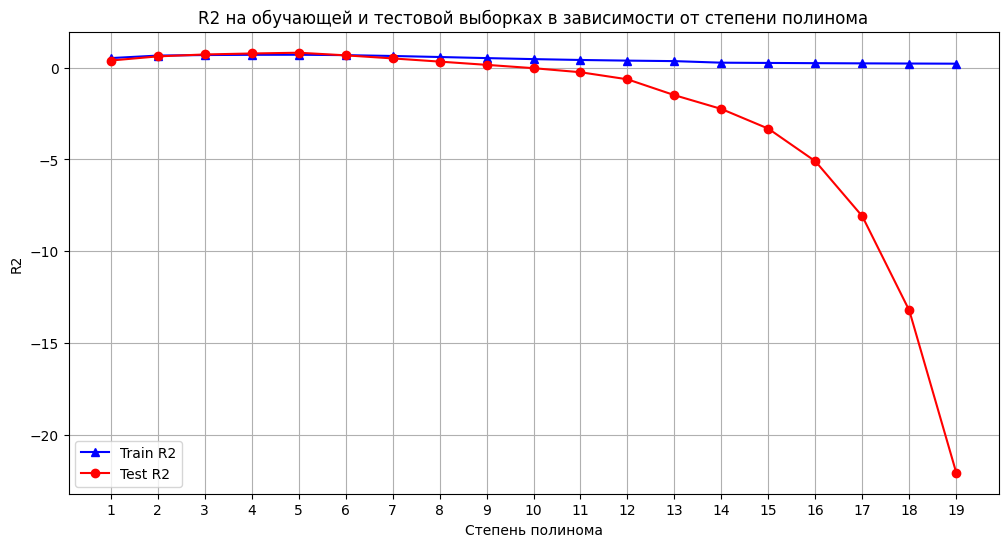

Лучший R2 на тестовой выборке: R2=0.82 достигается при k=5


In [41]:
# подберем наилучшую степень полинома отимизируя  R2
degrees = range(1,20) 
train_scores = []
test_scores = []
best_r2_test = 0
best_model = None

for degree in degrees:
    model = make_pipeline(
        PolynomialFeatures(degree, include_bias=False),
        LinearRegression()
    )
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    train_scores.append(r2_train)
    test_scores.append(r2_test)
    
    if r2_test > best_r2_test:
        best_r2_test = r2_test
        best_degree = degree
        best_model = model

# построим график зависимости R2 от степени полинома
plt.figure(figsize=(12, 6))
plt.plot(degrees, train_scores, 'b^-', label='Train R2')
plt.plot(degrees, test_scores, 'ro-', label='Test R2')
plt.title('R2 на обучающей и тестовой выборках в зависимости от степени полинома')
plt.xlabel('Степень полинома')
plt.ylabel('R2')
plt.xticks(degrees)
plt.legend()
plt.grid()
plt.show()

print(f"Лучший R2 на тестовой выборке: \
R2={best_r2_test:.2f} достигается при k={best_degree}")

несмотря на то, что прграмма выдет 5-ую степень как лучшую, мы можем видеть, что на меньших степенях значение R2 меняется очень незначительно, а значит мы можем взять оптимальную модель (я думаю k=4) для увеличения стойкости модели

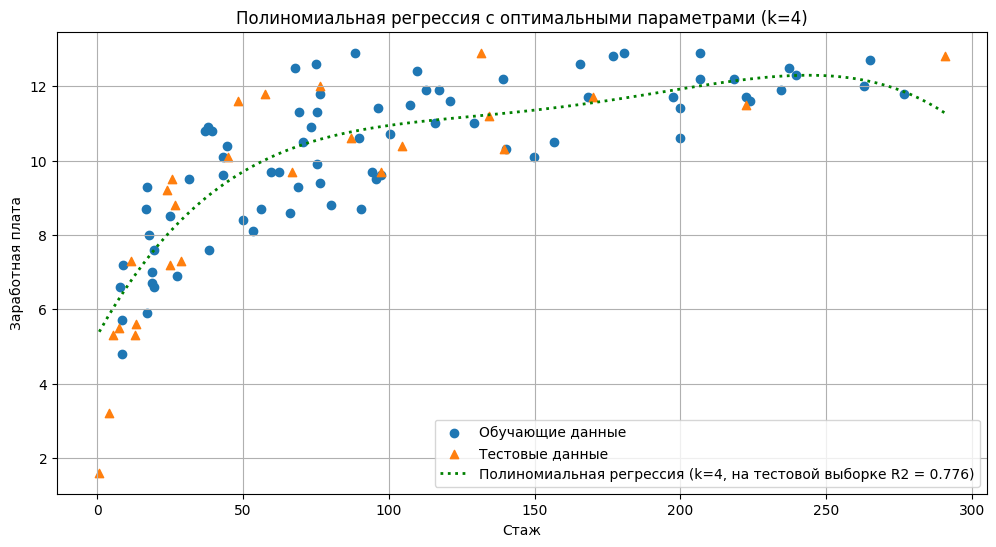

In [42]:
# построим график полиномиальной кривой

degree = 4
model_fourpoly = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    LinearRegression()
)
model_fourpoly.fit(x_train, y_train)


plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, label='Обучающие данные')
plt.scatter(x_test, y_test, marker='^', label='Тестовые данные')

x_plot = np.linspace(data_x.min(),data_x.max(), 100).reshape(-1, 1)
y_plot_poly = model_poly.predict(x_plot)

plt.plot(x_plot, 
         y_plot_poly, 
         color='green', 
         linestyle=':', 
         linewidth=2, 
         label=f'Полиномиальная регрессия (k={4}, на тестовой выборке R2 = {r2_poly:.3f})')
plt.title(f'Полиномиальная регрессия с оптимальными параметрами (k={4})')
plt.xlabel('Стаж')
plt.ylabel('Заработная плата')
plt.legend()
plt.grid()
plt.show()

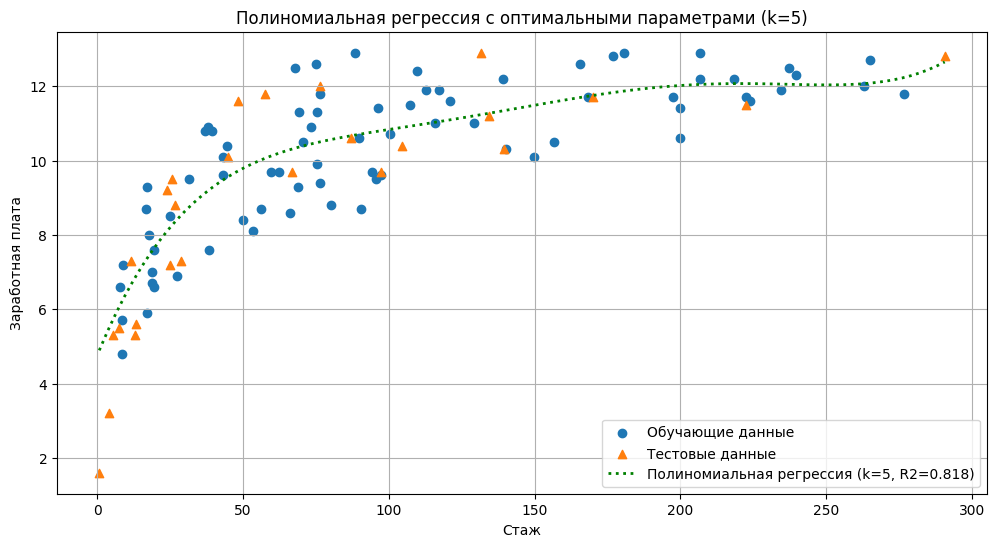

In [43]:
#для 5-ой степени
plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, label='Обучающие данные')
plt.scatter(x_test, y_test, marker='^', label='Тестовые данные')

x_plot = np.linspace(data_x.min(),data_x.max(), 100).reshape(-1, 1)
y_plot_poly = best_model.predict(x_plot)

plt.plot(x_plot, 
         y_plot_poly, 
         color='green', 
         linestyle=':', 
         linewidth=2, 
         label=f'Полиномиальная регрессия (k={best_degree}, R2={best_r2_test:.3f})')
plt.title(f'Полиномиальная регрессия с оптимальными параметрами (k={best_degree})')
plt.xlabel('Стаж')
plt.ylabel('Заработная плата')
plt.legend()
plt.grid()
plt.show()

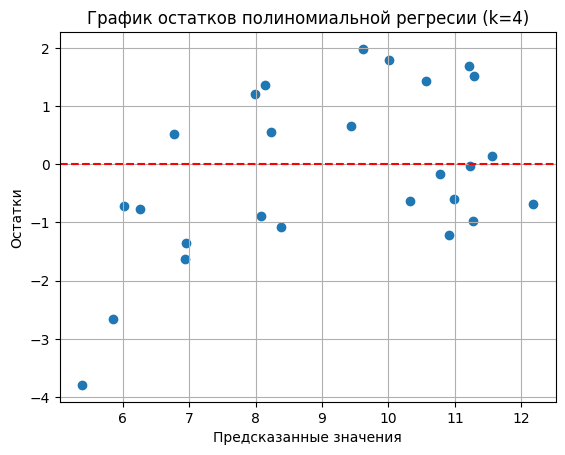

In [44]:
# построим прогноз на тестовой выборке 
y_pred_poly = model_fourpoly.predict(x_test)

# построим график остатков полиномиальной модели с оптимальными параметрами
residuals_poly = y_test - y_pred_poly
plt.scatter(y_pred_poly, residuals_poly)
plt.axhline(0, linestyle='--', color='red')
plt.title('График остатков полиномиальной регресии (k=4)')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.grid()
plt.show()

теперь остатки хаотично разбросаны вокруг 0

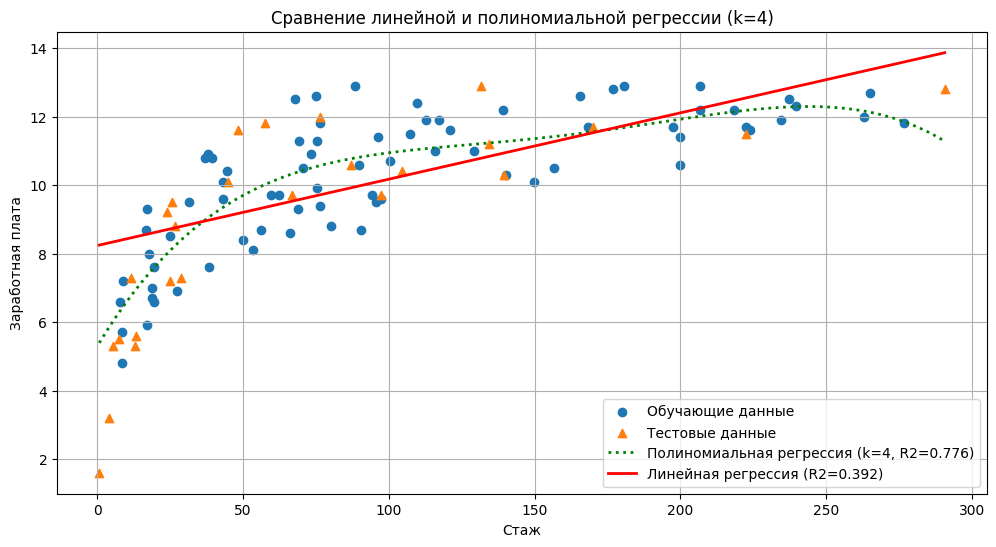

In [45]:
# сравним графически полиномиальную и линейную регрессии
plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, label='Обучающие данные')
plt.scatter(x_test, y_test, marker='^', label='Тестовые данные')

x_plot = np.linspace(data_x.min(),data_x.max(), 100).reshape(-1, 1)
y_plot_lin = model_lin.predict(x_plot) 
y_plot_poly = model_fourpoly.predict(x_plot)

plt.plot(x_plot, 
         y_plot_poly, 
         color='green', 
         linestyle=':', 
         linewidth=2, 
         label=f'Полиномиальная регрессия (k={degree}, R2={r2_poly:.3f})')
plt.plot(x_plot, 
         y_plot_lin, 
         color='red', 
         linewidth=2, 
         label=f'Линейная регрессия (R2={r2_lin:.3f})')

plt.title('Сравнение линейной и полиномиальной регрессии (k=4)')
plt.xlabel('Стаж')
plt.ylabel('Заработная плата')
plt.legend()
plt.grid()
plt.show()

# Выводы
### Полиномиальная регрессия намного улучшает показатель R2 при прогнозе, если на линейной регрессии R2 был всего 0,4, то при использовании полиномиальной регрессии 4 степени показатель возрос до 0,78. Конечно, мы можем еще увеличить степень до 5 и улучшить показатель на 3%, но тогда есть возможность осложнения нашей модели.